In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [4]:
iris = load_iris()
X = iris.data[:, (2,3)];
y = (iris.target==0).astype(np.int);
per_clf = Perceptron();
per_clf.fit(X,y);
y_pred = per_clf.predict([[2, 0.5]]);

/Users/fra/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In fact, Scikit-Learn’s Perceptron class is equivalent to using an `SGDClassifier` with the following hyperparameters: `loss="perceptron`, `learning_rate="constant`, `eta0=1` (the learning rate), and `penalty=None` (no regularization).

Contrary to Logistic Regression classifiers, Perceptrons do not output a class probability; rather, they just make predictions based on a hard threshold. This is one of the good reasons to prefer Logistic Regression over Perceptrons.

There exist some weaknesses for Perceptrons, in particular the fact that they are incapable of solving some trivial problems (e.g., the Exclusive OR (XOR) classification problem). Of course this is true of any other linear classification model as well (such as Logistic Regression).

However, it turns out that some of the limitations of Perceptrons can be eliminated by stacking multiple Perceptrons. 

In [5]:

print(tf.__version__,keras.__version__)

2.1.0 2.2.4-tf


In [6]:
 fashion_mnist = keras.datasets.fashion_mnist

In [7]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data();

In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_valid, X_train = X_train_full[:5000]/255., X_train_full[5000:]/255.

In [10]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"];
class_names[y_train[0]]

'Coat'

In [12]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
#neural network just composed of a single stack of layers, connected sequentially
model = keras.models.Sequential();
#latten layer whose role is simply to convert each input image into a 1D array
#if it receives input data X, it computes X.reshape(-1, 1). This layer does not have 
#any parameters, it is just there to do some simple preprocessing. Since it is the
#first layer in the model, you should specify the input_shape:
#Alternatively, you could add a keras.layers.InputLayer as the first layer,
model.add(keras.layers.Flatten(input_shape=[28, 28]));
model.add(keras.layers.Dense(300, activation='relu'));
model.add(keras.layers.Dense(100, activation='relu'));
# one outut neuron per class
model.add(keras.layers.Dense(10, activation='softmax'));

Instead of adding the layers one by one as we just did, you can pass a list of layers when creating the Sequential model:

In [14]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation="softmax")
    ]);

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
 model.layers

In [17]:
model.layers[0].name

'flatten_1'

All the parameters of a layer can be accessed using its `get_weights()` and `set_weights()` method

In [18]:
model.layers[1].get_weights()

[array([[-0.00750139,  0.05208854, -0.06803954, ...,  0.05454348,
         -0.01365226,  0.013699  ],
        [-0.01832159, -0.06986311, -0.00057953, ..., -0.04880586,
         -0.02773645,  0.05937293],
        [ 0.03042196,  0.06486151,  0.0046051 , ...,  0.0314239 ,
         -0.06000398,  0.00875198],
        ...,
        [-0.02748642,  0.05775917,  0.01107278, ..., -0.06861664,
         -0.04925692, -0.0730875 ],
        [-0.00158256,  0.01777094, -0.00142841, ...,  0.0132817 ,
          0.02905867,  0.05647796],
        [-0.01021216,  0.06663913,  0.0617533 , ..., -0.01564594,
         -0.06532486,  0.0603542 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [19]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=["accuracy"]);

We use `sparse_categorical_crossentropy` loss because we have sparse labels and the classes are esclusive.

If instead we had one target probability per class for each instance (such as one-hot vectors, e.g. `[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]` to represent class 3), then we would need to use the `categorical_crossentropy` loss instead. If we were doing binary classi‐ fication (with one or more binary labels), then we would use the `sigmoid`.

In [20]:
hist_obj = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid));
#history  = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 3s 54us/sample - loss: 0.7118 - accuracy: 0.7676 - val_loss: 0.5169 - val_accuracy: 0.8196
Epoch 2/30
55000/55000 [==============================] - 2s 44us/sample - loss: 0.4843 - accuracy: 0.8313 - val_loss: 0.4326 - val_accuracy: 0.8544
Epoch 3/30
55000/55000 [==============================] - 2s 44us/sample - loss: 0.4397 - accuracy: 0.8473 - val_loss: 0.4130 - val_accuracy: 0.8602
Epoch 4/30
55000/55000 [==============================] - 2s 43us/sample - loss: 0.4111 - accuracy: 0.8546 - val_loss: 0.4145 - val_accuracy: 0.8540
Epoch 5/30
55000/55000 [==============================] - 2s 44us/sample - loss: 0.3911 - accuracy: 0.8615 - val_loss: 0.3808 - val_accuracy: 0.8680
Epoch 6/30
55000/55000 [==============================] - 2s 44us/sample - loss: 0.3752 - accuracy: 0.8685 - val_loss: 0.3704 - val_accuracy: 0.8726
Epoch 7/30
55000/55000 [==============================] -

If the training set was very skewed, with some classes being overrepresented and oth‐ ers underrepresented, it would be useful to set the class_weight argument when calling the fit() method, giving a larger weight to underrepresented classes, and a lower weight to overrepresented classes. These weights would be used by Keras when computing the loss. 

If you need per-instance weights instead, you can set the sam ple_weight argument. You can also provide sample weights (but not class weights) for the validation set by adding them as a third item in the `validation_data` tuple.

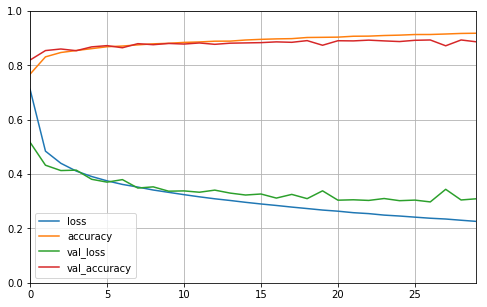

In [21]:
history = hist_obj
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] 
plt.show()

In [22]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 35us/sample - loss: 66.8660 - accuracy: 0.8416


[66.86598207092285, 0.8416]

In [23]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

If you only care about the class with the highest estima‐ ted probability (even if that probability is quite low) then you can use the pre `dict_classes()`

In [24]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [25]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [26]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target);
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full);
scaler = StandardScaler();
X_train_scaled = scaler.fit_transform(X_train);
#X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled =  scaler.transform(X_valid);
X_test_scaled =  scaler.transform(X_test);

#### With respect to the book, batch_size has been set because otherwise the values were None

Since the dataset is quite noisy, we just use a single hidden layer with fewer neurons than before, to avoid overfitting:

In [27]:
X_train

array([[   1.7743    ,   20.        ,    3.96111975, ...,    1.86469673,
          32.76      , -117.08      ],
       [   1.6354    ,   37.        ,    2.70588235, ...,    3.73333333,
          34.01      , -118.16      ],
       [   5.145     ,   19.        ,    4.21603261, ...,    1.66779891,
          33.83      , -118.43      ],
       ...,
       [   5.0853    ,   26.        ,    5.91649695, ...,    2.95723014,
          33.68      , -117.89      ],
       [   4.4545    ,   24.        ,    4.49760766, ...,    2.31339713,
          33.76      , -117.98      ],
       [   3.6815    ,   17.        ,    4.76586433, ...,    2.35667396,
          33.82      , -118.03      ]])

In [28]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
]);
model.compile(loss='mean_squared_error', optimizer='sgd');
history = model.fit(X_train_scaled, y_train, batch_size=128, epochs=20, validation_data=(X_valid_scaled, y_valid));
mse_test= model.evaluate(X_test_scaled, y_test);
X_new = X_test_scaled[:3];
y_pred = model.predict(X_new);
y_pred

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 0s 26us/sample - loss: 1.3898 - val_loss: 1.2725
Epoch 2/20
11610/11610 [==============================] - 0s 9us/sample - loss: 0.6372 - val_loss: 0.6048
Epoch 3/20
11610/11610 [==============================] - 0s 9us/sample - loss: 0.5582 - val_loss: 0.5565
Epoch 4/20
11610/11610 [==============================] - 0s 9us/sample - loss: 0.5238 - val_loss: 0.5434
Epoch 5/20
11610/11610 [==============================] - 0s 8us/sample - loss: 0.5030 - val_loss: 0.5082
Epoch 6/20
11610/11610 [==============================] - 0s 9us/sample - loss: 0.4869 - val_loss: 0.5087
Epoch 7/20
11610/11610 [==============================] - 0s 8us/sample - loss: 0.4785 - val_loss: 0.4904
Epoch 8/20
11610/11610 [==============================] - 0s 9us/sample - loss: 0.4693 - val_loss: 0.4840
Epoch 9/20
11610/11610 [==============================] - 0s 8us/sample - loss: 0.4604 - val_loss: 0.4

array([[2.5967293],
       [2.7552896],
       [2.7130415]], dtype=float32)

In [29]:
y_pred

array([[2.5967293],
       [2.7552896],
       [2.7130415]], dtype=float32)

In [30]:

model = keras.models.Sequential([
        keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
        keras.layers.Dense(1)
    ])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                        validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances 

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 48us/sample - loss: 1509460636897077424226828288.0000 - val_loss: 74537617281167392768.0000
Epoch 2/20
11610/11610 [==============================] - 0s 32us/sample - loss: 5187975148315064320.0000 - val_loss: 31805786678869.4648
Epoch 3/20
11610/11610 [==============================] - 0s 32us/sample - loss: 2213749890607.1548 - val_loss: 13571862.3318
Epoch 4/20
11610/11610 [==============================] - 0s 31us/sample - loss: 944632.6265 - val_loss: 7.2281
Epoch 5/20
11610/11610 [==============================] - 0s 31us/sample - loss: 1.7574 - val_loss: 1.3197
Epoch 6/20
11610/11610 [==============================] - 0s 31us/sample - loss: 1.3468 - val_loss: 1.3198
Epoch 7/20
11610/11610 [==============================] - 0s 31us/sample - loss: 1.3469 - val_loss: 1.3196
Epoch 8/20
11610/11610 [==============================] - 0s 31us/sample - loss: 1.3469 - val_loss: 1

In [31]:
y_pred = model.predict(X_new)
y_pred

array([[2.0775273],
       [2.0775273],
       [2.0775273]], dtype=float32)

# Wide and Deep Neural network 
It connects all or part of the inputs directly to the output layer. This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path). In contrast, a regular MLP forces all the data to flow through the full stack of layers, thus simple patterns in the data may end up being distorted by this sequence of transfor‐ mations.

In [32]:
input = keras.layers.Input(shape=X_train.shape[1:])
#notice that we call hidden1 like a function, passing it the input
hidden1 = keras.layers.Dense(30, activation="relu")(input)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input, hidden2])
output = keras.layers.Dense(1)(concat);

model = keras.models.Model(inputs=[input], outputs=[output])

But what if you want to send a subset of the features through the wide path, and a different subset (possibly overlapping) through the deep path? In this case, one solution is to use multiple inputs.

In [33]:
input_a = keras.layers.Input(shape=[5]);
input_b = keras.layers.Input(shape=[6]);
hidden1 = keras.layers.Dense(30, activation="relu")(input_b)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_a, hidden2])
output = keras.layers.Dense(1)(concat);

model = keras.models.Model(inputs=[input_a, input_b], outputs=[output])

In [34]:
model.compile(loss="mse", optimizer="sgd")
X_train_a, X_train_b = X_train[:, :5], X_train[:, 2:]
X_valid_a, X_valid_b = X_valid[:, :5], X_valid[:, 2:]
X_test_a, X_test_b = X_test[:, :5], X_test[:, 2:]
X_new_a = X_test_a[:3]
X_new_b = X_test_b[:3]
history = model.fit((X_train_a, X_train_b), y_train, batch_size=512, epochs=20, 
                    validation_data=((X_valid_a, X_valid_b), y_valid));
mse_test = model.evaluate((X_test_a, X_test_b), y_test);
y_pred = model.predict((X_new_a, X_new_b))
y_pred

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 0s 21us/sample - loss: nan - val_loss: nan
Epoch 2/20
11610/11610 [==============================] - 0s 3us/sample - loss: nan - val_loss: nan
Epoch 3/20
11610/11610 [==============================] - 0s 3us/sample - loss: nan - val_loss: nan
Epoch 4/20
11610/11610 [==============================] - 0s 3us/sample - loss: nan - val_loss: nan
Epoch 5/20
11610/11610 [==============================] - 0s 3us/sample - loss: nan - val_loss: nan
Epoch 6/20
11610/11610 [==============================] - 0s 3us/sample - loss: nan - val_loss: nan
Epoch 7/20
11610/11610 [==============================] - 0s 3us/sample - loss: nan - val_loss: nan
Epoch 8/20
11610/11610 [==============================] - 0s 3us/sample - loss: nan - val_loss: nan
Epoch 9/20
11610/11610 [==============================] - 0s 3us/sample - loss: nan - val_loss: nan
Epoch 10/20
11610/11610 [=========================

array([[nan],
       [nan],
       [nan]], dtype=float32)

### Adding extra output
Each output will need its own loss function, so when we compile the model we should pass a list of losses (if we pass a single loss, Keras will assume that the same loss must be used for all outputs).

y default, Keras will compute all these losses and simply add them up to get the final loss used for training. However, we care much more about the main output than about the auxiliary output (as it is just used for reg‐ ularization), so we want to give the main output’s loss a much greater weight.

Fortunately, it is possible to set all the loss weights when compiling the model:

In [35]:
output = keras.layers.Dense(1)(concat);
aux_output = keras.layers.Dense(1)(hidden2);
model = keras.models.Model(inputs=[input_a, input_b], outputs=[output, aux_output])

In [36]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

Now when we train the model, we need to provide some labels for each output. In this example, the main output and the auxiliary output should try to predict the same thing, so they should use the same labels. So instead of passing y_train, we just need to pass (y_train, y_train) 

In [37]:
history = model.fit([X_train_a, X_train_b], [y_train, y_train], epochs=20,
                   validation_data=((X_valid_a, X_valid_b), (y_valid, y_valid)));

total_loss, main_loss, aux_loss = model.evaluate((X_test_a, X_test_b), (y_test, y_test));


Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 77us/sample - loss: nan - dense_16_loss: nan - dense_17_loss: nan - val_loss: nan - val_dense_16_loss: nan - val_dense_17_loss: nan
Epoch 2/20
11610/11610 [==============================] - 0s 39us/sample - loss: nan - dense_16_loss: nan - dense_17_loss: nan - val_loss: nan - val_dense_16_loss: nan - val_dense_17_loss: nan
Epoch 3/20
11610/11610 [==============================] - 0s 39us/sample - loss: nan - dense_16_loss: nan - dense_17_loss: nan - val_loss: nan - val_dense_16_loss: nan - val_dense_17_loss: nan
Epoch 4/20
11610/11610 [==============================] - 0s 39us/sample - loss: nan - dense_16_loss: nan - dense_17_loss: nan - val_loss: nan - val_dense_16_loss: nan - val_dense_17_loss: nan
Epoch 5/20
11610/11610 [==============================] - 0s 39us/sample - loss: nan - dense_16_loss: nan - dense_17_loss: nan - val_loss: nan - val_dense_16_loss: nan - val_dense

In [38]:
y_pred_main, y_pred_aux = model.predict([X_new_a, X_new_b])

In [39]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name) 
        self.hidden1 = keras.layers.Dense(units, activation=activation) 
        self.hidden2 = keras.layers.Dense(units, activation=activation) 
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2]) 
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()

The `fit()` method accepts a callbacks argument that lets you specify a list of objects that Keras will call during training at the start and end of training, at the start and end of each epoch and even before and after processing each batch. For example, the `ModelCheckpoint` callback saves checkpoints of your model at regular intervals during training, by default at the end of each epoch. This is a simple way to implement early stopping

In [40]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
]);
#model.compile(loss='mean_squared_error', optimizer='sgd');
model.compile(loss="mse", optimizer="sgd")
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Train on 11610 samples
Epoch 1/10
11610/11610 [==============================] - 1s 50us/sample - loss: nan
Epoch 2/10
11610/11610 [==============================] - 0s 25us/sample - loss: nan
Epoch 3/10
11610/11610 [==============================] - 0s 25us/sample - loss: nan
Epoch 4/10
11610/11610 [==============================] - 0s 25us/sample - loss: nan
Epoch 5/10
11610/11610 [==============================] - 0s 25us/sample - loss: nan
Epoch 6/10
11610/11610 [==============================] - 0s 25us/sample - loss: nan
Epoch 7/10
11610/11610 [==============================] - 0s 25us/sample - loss: nan
Epoch 8/10
11610/11610 [==============================] - 0s 25us/sample - loss: nan
Epoch 9/10
11610/11610 [==============================] - 0s 25us/sample - loss: nan
Epoch 10/10
11610/11610 [==============================] - 0s 25us/sample - loss: nan


Moreover, if you use a validation set during training, you can set `save_best_only=True` when creating the ModelCheckpoint. In this case, it will only save your model when its performance on the validation set is the best so far

In [48]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
]);
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                                    save_best_only=True)
model.compile(loss="mse", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=10,
                        validation_data=(X_valid, y_valid),
callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 48us/sample - loss: 20996345791750814212030464.0000 - val_loss: 63369817090357823799296.0000
Epoch 2/10
11610/11610 [==============================] - 0s 32us/sample - loss: 4410673573105780654080.0000 - val_loss: 27040396836077568.0000
Epoch 3/10
11610/11610 [==============================] - 0s 33us/sample - loss: 1882068518016501.2500 - val_loss: 11538376483.8532
Epoch 4/10
11610/11610 [==============================] - 0s 32us/sample - loss: 803095258.2085 - val_loss: 4924.4671
Epoch 5/10
11610/11610 [==============================] - 0s 32us/sample - loss: 344.0041 - val_loss: 1.3229
Epoch 6/10
11610/11610 [==============================] - 0s 32us/sample - loss: 1.3469 - val_loss: 1.3196
Epoch 7/10
11610/11610 [==============================] - 0s 31us/sample - loss: 1.3469 - val_loss: 1.3197
Epoch 8/10
11610/11610 [==============================] - 0s 32us/sample - loss:

Another way to implement early stopping is to simply use the EarlyStopping callback. It will interrupt training when it measures no progress on the validation set for a number of epochs


In [49]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                      restore_best_weights=True)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
]);
model.compile(loss="mse", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=100,batch_size=512,
                        validation_data=(X_valid, y_valid),
                        callbacks=[checkpoint_cb, early_stopping_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 0s 17us/sample - loss: 511870802461896736768.0000 - val_loss: 2103295237752356864.0000
Epoch 2/100
11610/11610 [==============================] - 0s 3us/sample - loss: 1405150825597026560.0000 - val_loss: 830424390552193152.0000
Epoch 3/100
11610/11610 [==============================] - 0s 3us/sample - loss: 554781930568240576.0000 - val_loss: 327867986648454016.0000
Epoch 4/100
11610/11610 [==============================] - 0s 3us/sample - loss: 219039083009756896.0000 - val_loss: 129448839371936992.0000
Epoch 5/100
11610/11610 [==============================] - 0s 3us/sample - loss: 86481018454904848.0000 - val_loss: 51109055698759816.0000
Epoch 6/100
11610/11610 [==============================] - 0s 3us/sample - loss: 34144455802492472.0000 - val_loss: 20178875354291532.0000
Epoch 7/100
11610/11610 [==============================] - 0s 3us/sample - loss: 13480919010491390.0000

Epoch 69/100
11610/11610 [==============================] - 0s 3us/sample - loss: 1.3462 - val_loss: 1.3196
Epoch 70/100
11610/11610 [==============================] - 0s 3us/sample - loss: 1.3463 - val_loss: 1.3196
Epoch 71/100
11610/11610 [==============================] - 0s 3us/sample - loss: 1.3462 - val_loss: 1.3196
Epoch 72/100
11610/11610 [==============================] - 0s 3us/sample - loss: 1.3462 - val_loss: 1.3196
Epoch 73/100
11610/11610 [==============================] - 0s 3us/sample - loss: 1.3462 - val_loss: 1.3196
Epoch 74/100
11610/11610 [==============================] - 0s 2us/sample - loss: 1.3462 - val_loss: 1.3196
Epoch 75/100
11610/11610 [==============================] - 0s 3us/sample - loss: 1.3462 - val_loss: 1.3196
Epoch 76/100
11610/11610 [==============================] - 0s 3us/sample - loss: 1.3462 - val_loss: 1.3196
Epoch 77/100
11610/11610 [==============================] - 0s 3us/sample - loss: 1.3463 - val_loss: 1.3196


#### Custom callback

In [ ]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

As you might expect, you can implement `on_train_begin()`, `on_train_end()`, `on_epoch_begin()`, `on_epoch_begin()`, `on_batch_end()` and `on_batch_end()`.

Moreover, callbacks can also be used during evaluation and predictions, should you ever need them (e.g., for debugging). In this case, you should implement `on_test_begin()`, `on_test_end()`, `on_test_batch_begin()`, or on_test_batch_end() (called by evaluate()), or on_predict_begin(), on_pre dict_end(), `on_predict_batch_begin()`, or `on_predict_batch_end()` (called by `predict()`).

# Visualizing Using TensorBoard
TensorBoard is a great interactive visualization tool that you can use to view the learning curves during training, compare learning curves between multiple runs, vis‐ ualize the computation graph, analyze training statistics, view images generated by your model, visualize complex multidimensional data projected down to 3D and automatically clustered for you, and more! 

To use it, you must modify your program so that it outputs the data you want to visu‐ alize to special binary log files called event files.

In [ ]:
import os
root_logdir = os.path.join(os.curdir, "my_logs");
def get_run_logdir(): 
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S");
    return os.path.join(root_logdir, run_id);

run_logdir = get_run_logdir();

#tensorboard callback
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir) 


In [ ]:
history = model.fit(X_train, y_train, epochs=30,
                  validation_data=(X_valid, y_valid),
                  callbacks=[tensorboard_cb])

# Hyperparameters tuning

In [54]:
def build_model (n_hidden=1, n_neurons=3, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential();
    options = {"input_shape":input_shape};
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu", **options));
        options={};
    model.add(keras.layers.Dense(1, **options));
    optimizer = keras.optimizers.SGD(learning_rate);
    model.compile(loss="mse", optimizer=optimizer);
    return model;


### let's crete a `KerasRegressor` for the defined model

In [55]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model);
keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), 
              callbacks=[keras.callbacks.EarlyStopping(patience=10)]);
mse_test = keras_reg.score(X_test, y_test);
y_pred = keras_reg.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 50us/sample - loss: 962193.4992 - val_loss: 88.9526
Epoch 2/100
11610/11610 [==============================] - 0s 33us/sample - loss: 21.2950 - val_loss: 2.4401
Epoch 3/100
11610/11610 [==============================] - 0s 37us/sample - loss: 1.6016 - val_loss: 1.3348
Epoch 4/100
11610/11610 [==============================] - 0s 36us/sample - loss: 1.3497 - val_loss: 1.3197
Epoch 5/100
11610/11610 [==============================] - 0s 33us/sample - loss: 1.3464 - val_loss: 1.3196
Epoch 6/100
11610/11610 [==============================] - 0s 33us/sample - loss: 1.3464 - val_loss: 1.3197
Epoch 7/100
11610/11610 [==============================] - 0s 33us/sample - loss: 1.3464 - val_loss: 1.3196
Epoch 8/100
11610/11610 [==============================] - 0s 33us/sample - loss: 1.3464 - val_loss: 1.3196
Epoch 9/100
11610/11610 [==============================] - 0s 34us/sample - loss

Since there are many hyperparameters, it is preferable to use a randomized search rather than grid search

In [57]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
    "n_hidden"  : [0,1,2,3],
    "n_neurons" : np.arange(1,100),
    "learning_rate" : reciprocal(3e-4, 3e-2)
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3);
rnd_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)]);


Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 55us/sample - loss: nan - val_loss: nan
Epoch 2/100
7740/7740 [==============================] - 0s 35us/sample - loss: nan - val_loss: nan
Epoch 3/100
7740/7740 [==============================] - 0s 35us/sample - loss: nan - val_loss: nan
Epoch 4/100
7740/7740 [==============================] - 0s 36us/sample - loss: nan - val_loss: nan
Epoch 5/100
7740/7740 [==============================] - 0s 36us/sample - loss: nan - val_loss: nan
Epoch 6/100
7740/7740 [==============================] - 0s 35us/sample - loss: nan - val_loss: nan
Epoch 7/100
7740/7740 [==============================] - 0s 35us/sample - loss: nan - val_loss: nan
Epoch 8/100
7740/7740 [==============================] - 0s 35us/sample - loss: nan - val_loss: nan
Epoch 9/100
7740/7740 [==============================] - 0s 35us/sample - loss: nan - val_loss: nan
Epoch 10/100
7740/7740 [============================

7740/7740 [==============================] - 0s 16us/sample - loss: nan
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 57us/sample - loss: nan - val_loss: nan
Epoch 2/100
7740/7740 [==============================] - 0s 35us/sample - loss: nan - val_loss: nan
Epoch 3/100
7740/7740 [==============================] - 0s 34us/sample - loss: nan - val_loss: nan
Epoch 4/100
7740/7740 [==============================] - 0s 34us/sample - loss: nan - val_loss: nan
Epoch 5/100
7740/7740 [==============================] - 0s 34us/sample - loss: nan - val_loss: nan
Epoch 6/100
7740/7740 [==============================] - 0s 34us/sample - loss: nan - val_loss: nan
Epoch 7/100
7740/7740 [==============================] - 0s 34us/sample - loss: nan - val_loss: nan
Epoch 8/100
7740/7740 [==============================] - 0s 34us/sample - loss: nan - val_loss: nan
Epoch 9/100
7740/7740 [==============================] - 0s 34us/sample - loss: 

7740/7740 [==============================] - 0s 42us/sample - loss: nan - val_loss: nan
Epoch 10/100
7740/7740 [==============================] - 0s 17us/sample - loss: nan
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 68us/sample - loss: nan - val_loss: nan
Epoch 2/100
7740/7740 [==============================] - 0s 38us/sample - loss: nan - val_loss: nan
Epoch 3/100
7740/7740 [==============================] - 0s 39us/sample - loss: nan - val_loss: nan
Epoch 4/100
7740/7740 [==============================] - 0s 39us/sample - loss: nan - val_loss: nan
Epoch 5/100
7740/7740 [==============================] - 0s 39us/sample - loss: nan - val_loss: nan
Epoch 6/100
7740/7740 [==============================] - 0s 39us/sample - loss: nan - val_loss: nan
Epoch 7/100
7740/7740 [==============================] - 0s 39us/sample - loss: nan - val_loss: nan
Epoch 8/100
7740/7740 [==============================] - 0s 38us/sample - loss:

7740/7740 [==============================] - 0s 35us/sample - loss: 1.3468 - val_loss: 1.3197
Epoch 29/100
7740/7740 [==============================] - 0s 35us/sample - loss: 1.3468 - val_loss: 1.3197
Epoch 30/100
7740/7740 [==============================] - 0s 35us/sample - loss: 1.3468 - val_loss: 1.3197
Epoch 31/100
7740/7740 [==============================] - 0s 35us/sample - loss: 1.3468 - val_loss: 1.3197
Epoch 32/100
7740/7740 [==============================] - 0s 35us/sample - loss: 1.3468 - val_loss: 1.3197
Epoch 33/100
7740/7740 [==============================] - 0s 36us/sample - loss: 1.3468 - val_loss: 1.3196
Epoch 34/100
7740/7740 [==============================] - 0s 16us/sample - loss: 1.3466
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 65us/sample - loss: 9500850153408192512.0000 - val_loss: 3919520043384705.0000
Epoch 2/100
7740/7740 [==============================] - 0s 35us/sample - loss: 1357674171746093

7740/7740 [==============================] - 0s 37us/sample - loss: 1.3549 - val_loss: 1.3197
Epoch 28/100
7740/7740 [==============================] - 0s 42us/sample - loss: 1.3550 - val_loss: 1.3197
Epoch 29/100
7740/7740 [==============================] - 0s 36us/sample - loss: 1.3550 - val_loss: 1.3197
Epoch 30/100
7740/7740 [==============================] - 0s 36us/sample - loss: 1.3550 - val_loss: 1.3197
Epoch 31/100
7740/7740 [==============================] - 0s 36us/sample - loss: 1.3549 - val_loss: 1.3196
Epoch 32/100
7740/7740 [==============================] - 0s 36us/sample - loss: 1.3550 - val_loss: 1.3197
Epoch 33/100
7740/7740 [==============================] - 0s 35us/sample - loss: 1.3550 - val_loss: 1.3196
Epoch 34/100
7740/7740 [==============================] - 0s 36us/sample - loss: 1.3550 - val_loss: 1.3196
Epoch 35/100
7740/7740 [==============================] - 0s 35us/sample - loss: 1.3549 - val_loss: 1.3196
Epoch 36/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 57us/sample - loss: nan - val_loss: nan
Epoch 2/100
7740/7740 [==============================] - 0s 34us/sample - loss: nan - val_loss: nan
Epoch 3/100
7740/7740 [==============================] - 0s 34us/sample - loss: nan - val_loss: nan
Epoch 4/100
7740/7740 [==============================] - 0s 34us/sample - loss: nan - val_loss: nan
Epoch 5/100
7740/7740 [==============================] - 0s 34us/sample - loss: nan - val_loss: nan
Epoch 6/100
7740/7740 [==============================] - 0s 34us/sample - loss: nan - val_loss: nan
Epoch 7/100
7740/7740 [==============================] - 0s 34us/sample - loss: nan - val_loss: nan
Epoch 8/100
7740/7740 [==============================] - 0s 36us/sample - loss: nan - val_loss: nan
Epoch 9/100
7740/7740 [==============================] - 0s 50us/sample - loss: nan - val_loss: nan
Epoch 10/100
7740/7740 [==============================] - 0s 16us/sample - loss: nan
Train on 7740 samples, vali

/Users/fra/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


11610/11610 [==============================] - 1s 47us/sample - loss: 86799359364804032.0000 - val_loss: 19064074739885.5781
Epoch 2/100
11610/11610 [==============================] - 0s 32us/sample - loss: 4635240729717.3057 - val_loss: 326525904486.4000
Epoch 3/100
11610/11610 [==============================] - 0s 32us/sample - loss: 79391500544.3969 - val_loss: 5592676913.2155
Epoch 4/100
11610/11610 [==============================] - 0s 31us/sample - loss: 1359803320.3294 - val_loss: 95790303.0078
Epoch 5/100
11610/11610 [==============================] - 0s 31us/sample - loss: 23290464.6139 - val_loss: 1640691.3371
Epoch 6/100
11610/11610 [==============================] - 0s 32us/sample - loss: 398916.8877 - val_loss: 28102.6829
Epoch 7/100
11610/11610 [==============================] - 0s 31us/sample - loss: 6834.0673 - val_loss: 482.9552
Epoch 8/100
11610/11610 [==============================] - 0s 31us/sample - loss: 118.4501 - val_loss: 9.5636
Epoch 9/100
11610/11610 [=======

In [59]:
rnd_search_cv.best_params_, rnd_search_cv.best_score_

({'learning_rate': 0.0027931685350825347, 'n_hidden': 1, 'n_neurons': 19},
 -1.3465237868848696)

However, when training is slow (e.g., for more complex problems with larger datasets), this approach will only explore a tiny portion of the hyperparameter space. You can partially alleviate this problem by assisting the search process manually: first run a quick random search using wide ranges of hyperparameter values, then run another search using smaller ranges of values centered on the best ones found during the first run, and so on. This will hopefully zoom in to a good set of hyperparameters. However, this is very time consuming, and probably not the best use of your time.

Fortunately, there are many techniques to explore a search space much more efficiently than randomly. Their core idea is simple: when a region of the space turns out to be good, it should be explored more.

## Here are a few guidelines for choosing the number of hidden layers and neurons in an MLP, and selecting good values for some of the main hyperparameters.

### Number of hidden layers
For many problems, you can just begin with a single hidden layer and you will get reasonable results. Despite this, deep NN can model complex functions using exponentially fewer neurons than shallow nets, allowing them to reach much better performance with the same amount of training data.

Lower hidden layers model low-level struc‐ tures (e.g., line segments of various shapes and orientations), intermediate hidden layers combine these low-level structures to model intermediate-level structures (e.g., squares, circles), and the highest hidden layers and the output layer combine these intermediate structures to model high-level structures.

Not only does this hierarchical architecture help DNNs converge faster to a good sol‐ ution, it also improves their ability to generalize to new datasets. For example, if you have already trained a model to recognize faces in pictures, and you now want to train a new neural network to recognize hairstyles, then you can kickstart training by reusing the lower layers of the first network. Instead of randomly initializing the weights and biases of the first few layers of the new neural network, you can initialize them to the value of the weights and biases of the lower layers of the first network. This way the network will not have to learn from scratch all the low-level structures that occur in most pictures; it will only have to learn the higher-level structures (e.g., hairstyles). This is called ***transfer learning***.

Very complex tasks, such as large image classification or speech recognition, typically require networks with dozens of layers.

### Number of Neurons per hidden layer
Obviously the number of neurons in the input and output layers is determined by the type of input and output your task requires. 

As for the hidden layers, it used to be a common practice to size them to form a pyramid, with fewer and fewer neurons at each layer—the rationale being that many low- level features can coalesce into far fewer high-level features. 

However, this practice has been largely abandoned now, as it seems that simply using the same number of neurons in all hid‐ den layers performs just as well in most cases, or even better, and there is just one hyperparameter to tune instead of one per layer—for example, all hidden layers could simply have 150 neurons. However, depending on the dataset, it can sometimes help to make the first hidden layer bigger than the others.

Just like for the number of layers, you can try increasing the number of neurons grad‐ ually until the network starts overfitting. In general you will get more bang for the buck by increasing the number of layers than the number of neurons per layer. Unfortunately, as you can see, finding the perfect amount of neurons is still somewhat of a dark art.

A simpler approach is to pick a model with more layers and neurons than you actually need, then use early stopping to prevent it from overfitting.

### Learning Rate, Batch Size and Other Hyperparameters
- The **learning rate** is arguably the most important hyperparameter. In general, the optimal learning rate is about half of the maximum learning rate (i.e., the learning rate above which the training algorithm diverges). So a simple approach for tuning the learning rate is to start with a large value that makes the training algorithm diverge, then divide this value by 3 and try again, and repeat until the training algorithm stops diverging. At that point, you generally won’t be too far from the optimal learning rate. That said, it is sometimes useful to reduce the learning rate during training
- Choosing a better **optimizer** than plain old Mini-batch Gradient Descent 
- In general the **optimal batch size** will be lower than 32. A small batch size ensures that each training iteration is very fast, and although a large batch size will give a more precise estimate of the gradi‐ ents, in practice this does not matter much since the optimization landscape is quite complex and the direction of the true gradients do not point precisely in the direction of the optimum. However, having a batch size greater than 10 helps take advantage of hardware and software optimizations, in particular for matrix multiplications, so it will speed up training. Moreover, if you use Batch Normal‐ ization (see Chapter 11), the batch size should not be too small (in general no less than 20).
- in general, the ReLU **activation function** will be a good default for all hidden layers. For the output layer, it really depends on your task.
- In most cases, the **number of training iterations** does not actually need to be tweaked: just use early stopping instead.

# Exercises

## 2) Draw an ANN using the original artificial neurons (like the ones in Figure 10-3) that computes A ⊕ B (where ⊕ represents the XOR operation). Hint: A ⊕ B = (A ∧ ¬ B) ∨ (¬ A ∧ B).

In [88]:
model.predict(X_train)

array([[1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

## 3) Why is it generally preferable to use a Logistic Regression classifier rather than a classical Perceptron (i.e., a single layer of threshold logic units trained using the Perceptron training algorithm)? How can you tweak a Perceptron to make it equivalent to a Logistic Regression classifier?

A classical Perceptron will converge only if the dataset is linearly separable, and it won’t be able to estimate class probabilities. In contrast, a Logistic Regression classifier will converge to a good solution even if the dataset is not linearly separable, and it will output class probabilities. If you change the Perceptron’s activation function to the logistic activation function (or the softmax activation function if there are multiple neurons), and if you train it using Gradient Descent (or some other optimization algorithm minimizing the cost function, typically cross entropy), then it becomes equivalent to a Logistic Regression classifier.

## 4) Why was the logistic activation function a key ingredient in training the first MLPs?
The logistic activation function was a key ingredient in training the first MLPs because its derivative is always nonzero, so Gradient Descent can always roll down the slope. When the activation function is a step function, Gradient Descent cannot move, as there is no slope at all.

## 5) Name three popular activation functions. Can you draw them?
sigmoid/softmax, arctan, relu, step funcion

## 6) Suppose you have an MLP composed of one input layer with 10 passthrough neurons, followed by one hidden layer with 50 artificial neurons, and finally one output layer with 3 artificial neurons. All artificial neurons use the ReLU activation function.
## - What is the shape of the input matrix $X$?
## - What about the shape of the hidden layer’s weight vector $W_h$, and the shape of its bias vector $b_h$?
## - What is the shape of the output layer’s weight vector $W_o$, and its bias vector $b_o$?
## - What is the shape of the network’s output matrix $Y$?
## - Write the equation that computes the network’s output matrix $Y$ as a function of $X$, $W_h$, $b_h$, $W_o$ and $b_o$.

- The shape of the input matrix $X$ is $m × 10$, where m represents the training batch size.
- $W_h$: $10\times 50$, $b_h$: $50$
- $W_o$: $50\times 3$, $b_o$: $3$
- $m\times 3$
- $$Y = sigmoid(sigmoid(X W_h + b_h) W_o+b_o)$$

## 7) How many neurons do you need in the output layer if you want to classify email into spam or ham? What activation function should you use in the output layer? If instead you want to tackle MNIST, how many neurons do you need in the output layer, using what activation function? Answer the same questions for getting your network to predict housing prices as in Chapter 2.

To classify email into spam or ham, you just need one neuron in the output layer of a neural network—for example, indicating the probability that the email is spam. You would typically use the logistic activation function in the output layer when estimating a probability. If instead you want to tackle MNIST, you need 10 neurons in the output layer, and you must replace the logistic function with the softmax activation function, which can handle multiple classes, outputting one probability per class. Now, if you want your neural network to predict housing prices like in Chapter 2, then you need one output neuron, using no activation function at all in the output layer.4

## 8) What is backpropagation?
Backpropagation is a technique used to train artificial neural networks. It first computes the gradients of the cost function with regards to every model parame‐ ter (all the weights and biases), and then it performs a Gradient Descent step using these gradients. This backpropagation step is typically performed thou‐ sands or millions of times, using many training batches, until the model parame‐ ters converge to values that (hopefully) minimize the cost function. To compute the gradients, backpropagation uses reverse-mode autodiff (although it wasn’t called that when backpropagation was invented, and it has been reinvented sev‐ eral times). Reverse-mode autodiff performs a forward pass through a computa‐ tion graph, computing every node’s value for the current training batch, and then it performs a reverse pass, computing all the gradients at once (see Appendix D for more details). So what’s the difference? Well, backpropagation refers to the whole process of training an artificial neural network using multiple backpropa‐ gation steps, each of which computes gradients and uses them to perform a Gra‐ dient Descent step. In contrast, reverse-mode autodiff is a simply a technique to compute gradients efficiently, and it happens to be used by backpropagation.

## 10) Train a deep MLP on the MNIST dataset and see if you can get over 98% precision. Just like in the last exercise of chapter 9, try adding all the bells and whistles (i.e., save checkpoints, restore the last checkpoint in case of an interruption, add summaries, plot learning curves using TensorBoard, and so on).

In [90]:
n_inputs = 28*28;
n_hidden1 = 300;
n_hidden2 = 100;
n_outputs = 10;


So far we have used Variables to manage our data, but there is a more basic structure, the ***placeholder***. A placeholder is simply a variable that we will assign data to at a later date. It allows us to create our operations and build our computation graph, without needing the data. In TensorFlowterminology, we then feed data into the graph through these placeholders.

In [123]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
#X_train = X_train.reshape(-1, 28*28);
#X_test  = X_test.reshape(-1, 28*28);
model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(300, activation="relu",),
        keras.layers.Dense(100, activation="relu",),
        keras.layers.Dense(10, activation="relu")
])

In [124]:
model.compile(optimizer='sgd', loss='mse')

In [125]:
model.fit(X_train, y_train, epochs=20)

ValueError: A target array with shape (60000, 1) was passed for an output of shape (None, 10) while using as loss `mean_squared_error`. This loss expects targets to have the same shape as the output.